In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams 
from IPython.display import display, HTML

In [11]:
match_data=pd.read_csv("IPL Matches 2008-2020.csv")
ball_data=pd.read_csv("IPL Ball-by-Ball 2008-2020.csv")
display(HTML("<h1>The Datasets<h1>"))

              

In [12]:
match_data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,19-04-2008,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,19-04-2008,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,20-04-2008,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,20-04-2008,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [13]:
ball_data.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [46]:
print("Cities at which matches played ")
for i in match_data["city"].unique():
    print(i,end="\t")

Cities at which matches played 
Bangalore	Chandigarh	Delhi	Mumbai	Kolkata	Jaipur	Hyderabad	Chennai	Cape Town	Port Elizabeth	Durban	Centurion	East London	Johannesburg	Kimberley	Bloemfontein	Ahmedabad	Cuttack	Nagpur	Dharamsala	Kochi	Indore	Visakhapatnam	Pune	Raipur	Ranchi	Abu Dhabi	nan	Rajkot	Kanpur	Bengaluru	Dubai	Sharjah	

In [48]:
print(pd.Series(match_data["city"].unique()))

0          Bangalore
1         Chandigarh
2              Delhi
3             Mumbai
4            Kolkata
5             Jaipur
6          Hyderabad
7            Chennai
8          Cape Town
9     Port Elizabeth
10            Durban
11         Centurion
12       East London
13      Johannesburg
14         Kimberley
15      Bloemfontein
16         Ahmedabad
17           Cuttack
18            Nagpur
19        Dharamsala
20             Kochi
21            Indore
22     Visakhapatnam
23              Pune
24            Raipur
25            Ranchi
26         Abu Dhabi
27               NaN
28            Rajkot
29            Kanpur
30         Bengaluru
31             Dubai
32           Sharjah
dtype: object


In [40]:
print("Match played so far:",match_data.shape[0])
print("\n Cities played at :",match_data["city"].unique())
print("\n Teams participated :",match_data["team1"].unique())

Match played so far: 816

 Cities played at : ['Bangalore' 'Chandigarh' 'Delhi' 'Mumbai' 'Kolkata' 'Jaipur' 'Hyderabad'
 'Chennai' 'Cape Town' 'Port Elizabeth' 'Durban' 'Centurion' 'East London'
 'Johannesburg' 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur'
 'Dharamsala' 'Kochi' 'Indore' 'Visakhapatnam' 'Pune' 'Raipur' 'Ranchi'
 'Abu Dhabi' nan 'Rajkot' 'Kanpur' 'Bengaluru' 'Dubai' 'Sharjah']

 Teams participated : ['Royal Challengers Bangalore' 'Kings XI Punjab' 'Delhi Daredevils'
 'Mumbai Indians' 'Kolkata Knight Riders' 'Rajasthan Royals'
 'Deccan Chargers' 'Chennai Super Kings' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Gujarat Lions'
 'Rising Pune Supergiants' 'Rising Pune Supergiant' 'Delhi Capitals']


In [16]:
match_data["Season"]=pd.DatetimeIndex(match_data['date']).year
match_data.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Season
0,335982,Bangalore,18-04-2008,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,19-04-2008,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,19-04-2008,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,20-04-2008,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,20-04-2008,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008


In [17]:
match_per_season=match_data.groupby(['Season'])['id'].count().reset_index().rename(columns={'id':'matches'})
match_per_season

,Season,matches
0,2008,58
1,2009,57
2,2010,60
3,2011,73
4,2012,74
5,2013,76
6,2014,60
7,2015,59
8,2016,60
9,2017,59


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


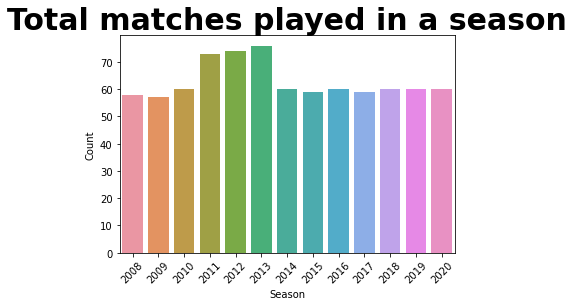

In [18]:
sns.countplot(match_data['Season'])
plt.xticks(rotation=45,fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Season",fontsize=10)
plt.ylabel("Count",fontsize=10)
plt.title('Total matches played in a season',fontsize=30,fontweight="bold")
rcParams['figure.figsize']=6,9

In [19]:
##Merging data
season_data=match_data[['id',"Season"]].merge(ball_data,left_on="id",right_on="id",how="left").drop('id',axis=1)
season_data.head()

,Season,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,2008,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,2008,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,2008,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,2008,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,2008,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [20]:
season=season_data.groupby(["Season"])["total_runs"].sum().reset_index()
season


,Season,total_runs
0,2008,17937
1,2009,16320
2,2010,18864
3,2011,21154
4,2012,22453
5,2013,22541
6,2014,18909
7,2015,18332
8,2016,18862
9,2017,18769


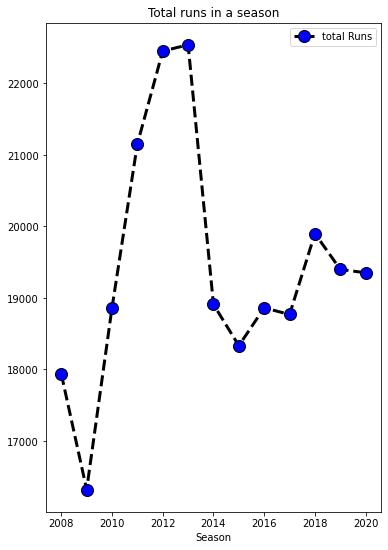

In [21]:
x1=season["Season"]
x2=season["total_runs"]
plt.plot(x1,x2,color="black",linestyle="dashed",linewidth="3",marker="o",markerfacecolor="blue",markersize=12,label="total Runs")
plt.legend()
plt.xlabel('Season')
plt.title("Total runs in a season")
rcParams['figure.figsize']=6,7

In [22]:
runs_per_season=pd.concat([match_per_season,season.iloc[:,1]],axis=1)
runs_per_season["Runs scored per match"]=runs_per_season['total_runs']/runs_per_season["matches"]
runs_per_season.set_index('Season',inplace=True)
runs_per_season


,matches,total_runs,Runs scored per match
Season,,,
2008,58,17937,309.258621
2009,57,16320,286.315789
2010,60,18864,314.400000
2011,73,21154,289.780822
2012,74,22453,303.418919
2013,76,22541,296.592105
2014,60,18909,315.150000
2015,59,18332,310.711864
2016,60,18862,314.366667


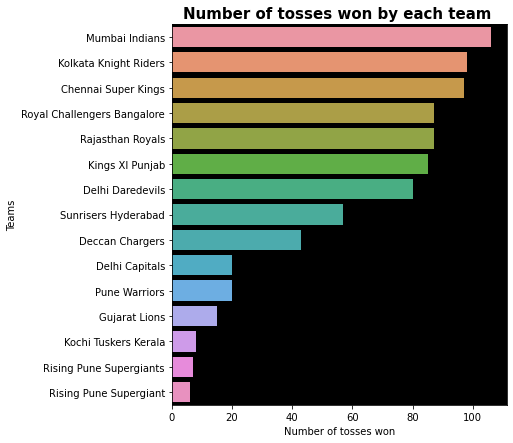

In [23]:
toss=match_data["toss_winner"].value_counts()
ax=plt.axes()
ax.set(facecolor="black")
ax.set_title("Number of tosses won by each team ",fontsize=15,fontweight="bold")
sns.barplot(y=toss.index,x=toss)
plt.xlabel('Number of tosses won')
plt.ylabel("Teams")

rcParams['figure.figsize']=10,9
plt.show()



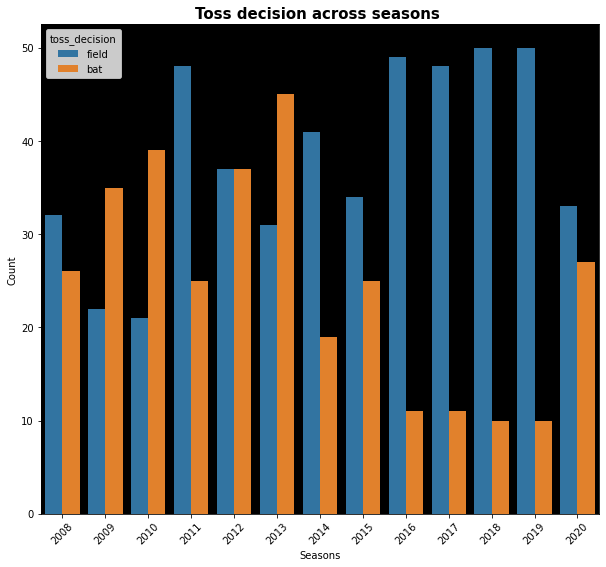

In [24]:
ax=plt.axes()
ax.set(facecolor="black")
ax.set_title("Toss decision across seasons ",fontsize=15,fontweight="bold")
sns.countplot(x="Season",hue="toss_decision",data=match_data)
plt.xlabel('Seasons')
plt.ylabel("Count")
plt.xticks(rotation=45,fontsize=10)
rcParams['figure.figsize']=10,8
plt.show()

In [25]:
match_data['result'].value_counts()

wickets    435
runs       364
tie         13
Name: result, dtype: int64

In [26]:
match_data.venue[match_data.result!='runs'].mode()

0    Eden Gardens
dtype: object

In [27]:
match_data.venue[match_data.result!='wickets'].mode()

0    Feroz Shah Kotla
dtype: object

In [28]:
match_data.venue[match_data.toss_winner=="Kings XI Punjab"][match_data.winner=="Kings XI Punjab"].mode()

0    Punjab Cricket Association Stadium, Mohali
dtype: object

In [29]:
match_data.winner[match_data.result!="runs"].mode()

0    Kolkata Knight Riders
1           Mumbai Indians
dtype: object

In [30]:
match_data.winner[match_data.result!="wickets"].mode()

0    Mumbai Indians
dtype: object

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


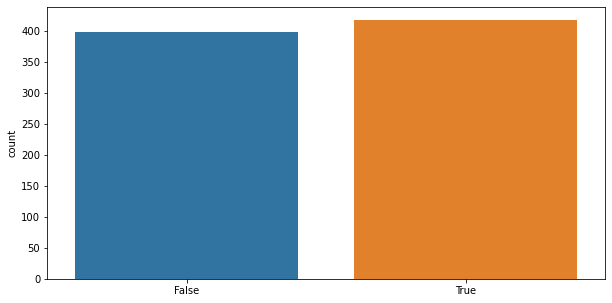

In [31]:
display(HTML("<h1>Matches won by wining the toss<h1>"))
toss=match_data['toss_winner']==match_data['winner']
plt.figure(figsize=(10,5))
sns.countplot(toss)
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


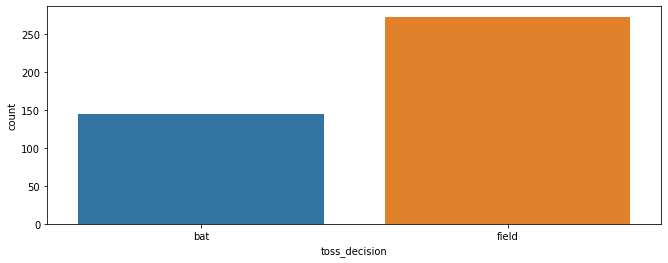

In [32]:
display(HTML("<h1>Teams toss decisions and win matches<h1>"))
plt.figure(figsize=(11,4))
sns.countplot(match_data.toss_decision[match_data.toss_winner==match_data.winner])
plt.show()

In [33]:
match_data[match_data['result_margin']==match_data['result_margin'].max()]

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,Season
620,1082635,Delhi,06-05-2017,LMP Simmons,Feroz Shah Kotla,0,Delhi Daredevils,Mumbai Indians,Delhi Daredevils,field,Mumbai Indians,runs,146.0,N,NaN,Nitin Menon,CK Nandan,2017


In [34]:
runs=ball_data.groupby(['batsman'])['batsman_runs'].sum().reset_index()
runs.columns=['Batsman','runs']
z=runs.sort_values(by='runs',ascending=False).head(10).reset_index().drop('index',axis=1)
z

,Batsman,runs
0,V Kohli,5878
1,SK Raina,5368
2,DA Warner,5254
3,RG Sharma,5230
4,S Dhawan,5197
5,AB de Villiers,4849
6,CH Gayle,4772
7,MS Dhoni,4632
8,RV Uthappa,4607
9,G Gambhir,4217


<ipython-input-35-1e92bccedb49>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.axes()


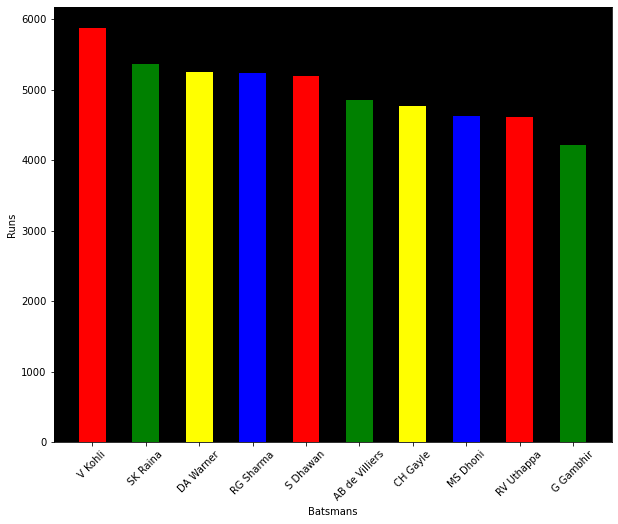

In [35]:
display(HTML("<h1>Top Batsman<h1>"))
x1=z["Batsman"]
y1=z["runs"]
plt.bar(x1,y1,width=0.5,color=["Red","Green","Yellow","Blue"])
plt.xlabel("Batsmans")
plt.ylabel("Runs")
plt.xticks(rotation=45,fontsize=10)
ax=plt.axes()
ax.set_facecolor("Black")
plt.show()

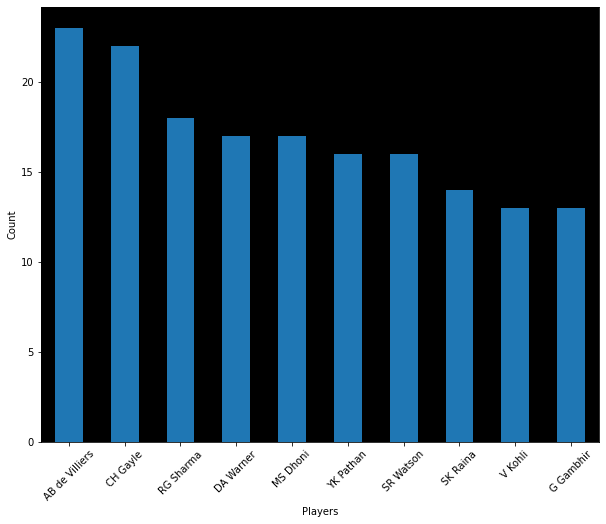

In [36]:
display(HTML("<h1>Top Man Of the Matches Awards<h1>"))
ax=plt.axes()
ax.set_facecolor("Black")
match_data.player_of_match.value_counts()[:10].plot(kind='bar')
plt.xlabel("Players")
plt.ylabel("Count")
plt.xticks(rotation=45,fontsize=10)
plt.show()